In [18]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

W= [80 80]
W= [79.2 79.2]
W= [78.4 78.4]
W= [77.6 77.6]
W= [76.8 76.8]
W= [76. 76.]
W= [75.2 75.2]
W= [74.4 74.4]
W= [73.6 73.6]
W= [72.8 72.8]
W= [72. 72.]
W= [71.2 71.2]
W= [70.4 70.4]
W= [69.6 69.6]
W= [68.8 68.8]
W= [68. 68.]
W= [67.2 67.2]
W= [66.4 66.4]
W= [65.6 65.6]
W= [64.8 64.8]
W= [64. 64.]
W= [63.2 63.2]
W= [62.4 62.4]
W= [61.6 61.6]
W= [60.8 60.8]
W= [60. 60.]
W= [59.2 59.2]
W= [58.4 58.4]
W= [57.6 57.6]
W= [56.8 56.8]
W= [56. 56.]
W= [55.2 55.2]
W= [54.4 54.4]
W= [53.6 53.6]
W= [52.8 52.8]
W= [52. 52.]
W= [51.2 51.2]
W= [50.4 50.4]
W= [49.6 49.6]
W= [48.8 48.8]
W= [48. 48.]
W= [47.2 47.2]
W= [46.4 46.4]
W= [45.6 45.6]
W= [44.8 44.8]
W= [44. 44.]
W= [43.2 43.2]
W= [42.4 42.4]
W= [41.6 41.6]
W= [40.8 40.8]
W= [40. 40.]
W= [39.2 39.2]
W= [38.4 38.4]
W= [37.6 37.6]
W= [36.8 36.8]
W= [36. 36.]
W= [35.2 35.2]
W= [34.4 34.4]
W= [33.6 33.6]
W= [32.8 32.8]
W= [32. 32.]
W= [31.2 31.2]
W= [30.4 30.4]
W= [29.6 29.6]
W= [28.8 28.8]
W= [28. 28.]
W= [27.2 27.2]
W= [26.4 26.4]
W= [25.6 2

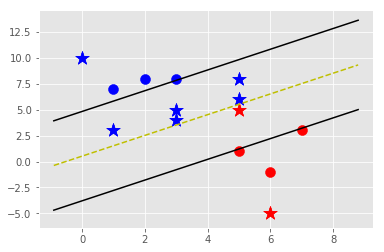

In [36]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

class Support_Vector_Machine:
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    # train
    def fit(self, data):
        self.data = data
        # { ||w||: [w,b] }
        opt_dict = {}

        transforms = [[1,1],
                      [-1,1],
                      [-1,-1],
                      [1,-1]]

        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)   #[1, 7, 2, 8, 3, 8, 5, 1, 6, -1, 7, 3]

        self.max_feature_value = max(all_data)  #8
        self.min_feature_value = min(all_data)#-1
        all_data = None
        # support vectors yi(xi.w+b) = 1
        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      # point of expense:
                      self.max_feature_value * 0.001,
                      #self.max_feature_value * 0.0001
                      ]
        # extremely expensive
        b_range_multiple = 2
        # we dont need to take as small of steps
        # with b as we do w
        b_multiple = 5
        latest_optimum = self.max_feature_value*10
        
        for step in step_sizes: #0.1,0.01,0.002
            w = np.array([latest_optimum,latest_optimum])
            #print('W=',w) [80,80] , [2.4,2.4] , [0.48,0.48]
            #print('-----')
            # we can do this because convex
            optimized = False
            while not optimized:

                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        # 
                        # yi(xi.w+b) >= 1
                        # 
                        # #### add a break here later..
                        for i in self.data:  # -1 , +1
                            for xi in self.data[i]:
                                yi=i
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                                    #print(xi,':',yi*(np.dot(w_t,xi)+b))
                                    
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]
                print('W=',w)
                if w[0] < 0:
                    optimized = True
                    print('Optimized a step.')
                else:
                    w = w - step

            norms = sorted([n for n in opt_dict])
            #||w|| : [w,b]
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            print('----',opt_choice[0][0],self.b)
            latest_optimum = opt_choice[0][0]+step*2
            print('latest_optimum',latest_optimum)
            
        for i in self.data:
            for xi in self.data[i]: #[][][][][][]
                yi=i #-1,+1
                print(xi,':',yi*(np.dot(self.w,xi)+self.b))            

    def predict(self,features):
        # sign( x.w+b )
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        if classification !=0 and self.visualization:
            self.ax.scatter(features[0], features[1], s=200, marker='*', c=self.colors[classification])
        return classification
    
    
    def predict1(self,features):
        # sign( x.w+b )
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        return classification

    def visualize(self):
        [[self.ax.scatter(x[0],x[1],s=100,color=self.colors[i]) for x in data_dict[i]] for i in data_dict]

        # hyperplane = x.w+b
        # v = x.w+b
        # psv = 1
        # nsv = -1
        # dec = 0
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]

        datarange = (self.min_feature_value*0.9,self.max_feature_value*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]

        # (w.x+b) = 1
        # positive support vector hyperplane
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k')

        # (w.x+b) = -1
        # negative support vector hyperplane
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')

        # (w.x+b) = 0
        # positive support vector hyperplane
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min,hyp_x_max],[db1,db2], 'y--')

        plt.show()
        
data_dict = {-1:np.array([[1,7],
                          [2,8],
                          [3,8],]),
             
             1:np.array([[5,1],
                         [6,-1],
                         [7,3],])}

svm = Support_Vector_Machine()
svm.fit(data=data_dict)

predict_us = [[0,10],
              [1,3],
              [3,4],
              [3,5],
              [5,5],
              [5,6],
              [6,-5],
              [5,8]]
print('new feature ------',svm.predict1([[2,10]]))


for p in predict_us:
    svm.predict(p)
    print(svm.predict(p))

svm.visualize()